In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data set
k = pd.read_csv('C:/Users/hocha/Documents/Portfolio Models/Clustering/online_retail.csv', encoding='ISO-8859-1')

k.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#Get information about the dataset

pd.set_option('display.float_format', lambda x: '%.2f' % x)
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [4]:
# Check missing values

print(k.isnull().sum())


index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
# Drop rows with missing values

k.dropna(inplace=True)



In [6]:
# Check to see descriptive statistics
k.describe()

,index,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00,406829.00
mean,278048.16,12.06,3.46,15287.69
std,152744.02,248.69,69.32,1713.60
min,0.00,-80995.00,0.00,12346.00
25%,147749.00,2.00,1.25,13953.00
50%,284435.00,5.00,1.95,15152.00
75%,409528.00,12.00,3.75,16791.00
max,541908.00,80995.00,38970.00,18287.00


In [7]:
# Remove negative values on the Quantity variable

k = k[(k['Quantity'] > 0)]

#  Recheck for negative values in Quantity variable

k.describe()

,index,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00,397924.00
mean,278465.22,13.02,3.12,15294.32
std,152771.37,180.42,22.10,1713.17
min,0.00,1.00,0.00,12346.00
25%,148333.75,2.00,1.25,13969.00
50%,284907.50,6.00,1.95,15159.00
75%,410079.25,12.00,3.75,16795.00
max,541908.00,80995.00,8142.75,18287.00


In [8]:
#Change format of the date

from datetime import datetime

# Calculate the recent date of purchase

k['InvoiceDate']= pd.to_datetime(k['InvoiceDate'])

l = max(k['InvoiceDate']) + pd.DateOffset(days=1)
print(l) 

#Calculate the total income per customer

k['Income'] = k['Quantity'] * k['UnitPrice']


# Keep only the most recent date of purchase
k['Diff'] = k.sort_values(['CustomerID','InvoiceDate']).groupby(['CustomerID'])['InvoiceDate'].rank(method='min').astype(int)
Recency = k[k['Diff']==1]

Recency['Recency'] = (Recency['InvoiceDate'] - pd.to_datetime(min(Recency['InvoiceDate']))).dt.days

Recency.head()



2011-12-10 12:50:00


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Income,Diff,Recency
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30,1,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,1,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00,1,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,1,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34,1,0


In [9]:
#Calculate Frequecy of purchase for each customer

prev = Recency.groupby('CustomerID')['InvoiceDate'].count()
Freq = pd.DataFrame(prev).reset_index()
Freq.columns = ['CustomerID','Frequency']

k2 = Freq.merge(Recency,on='CustomerID')

k2.head(10)


,CustomerID,Frequency,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Income,Diff,Recency
0,12346.00,1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60,1,48
1,12347.00,31,14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20,1,6
2,12347.00,31,14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland,17.00,1,6
3,12347.00,31,14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland,39.00,1,6
4,12347.00,31,14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland,23.40,1,6
5,12347.00,31,14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,Iceland,15.00,1,6
6,12347.00,31,14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,Iceland,15.00,1,6
7,12347.00,31,14944,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,Iceland,15.00,1,6
8,12347.00,31,14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,Iceland,15.00,1,6
9,12347.00,31,14946,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,Iceland,15.00,1,6


In [10]:
# Calculate Total Income generated per customer


k2['Income'] = k2['Quantity']*k2['UnitPrice']
inc = k2.groupby('CustomerID')['Income'].sum()
inc = pd.DataFrame(inc).reset_index()
inc.columns = ['CustomerID','Yield']


In [11]:
# Extract new variables 

k3 = inc.merge(k2,on='CustomerID')

k3 = k3[['CustomerID','Recency','Frequency','Yield']]
k3.head()

,CustomerID,Recency,Frequency,Yield
0,12346.00,48,1,77183.60
1,12347.00,6,31,711.79
2,12347.00,6,31,711.79
3,12347.00,6,31,711.79
4,12347.00,6,31,711.79


In [12]:
# Check summary of statistics for our data

k3.describe()

,CustomerID,Recency,Frequency,Yield
count,104058.00,104058.00,104058.00,104058.00
mean,15276.79,161.94,47.46,596.90
std,1722.71,121.53,40.07,764.75
min,12346.00,0.00,1.00,0.00
25%,13777.00,54.00,20.00,244.19
50%,15332.00,134.00,36.00,382.27
75%,16776.00,288.00,62.00,674.68
max,18287.00,373.00,277.00,77183.60


Recency: 


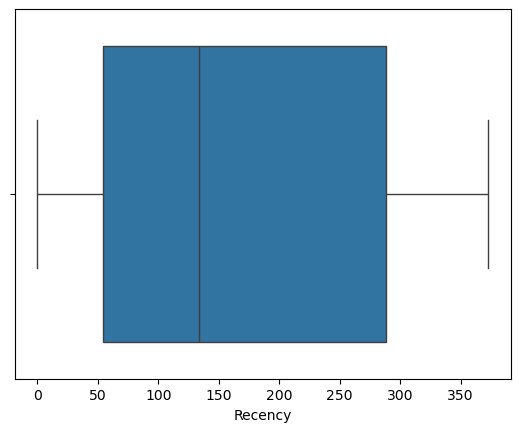

Frequency: 


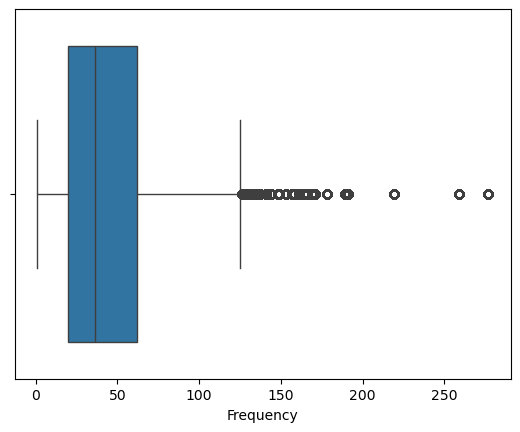

Yield: 


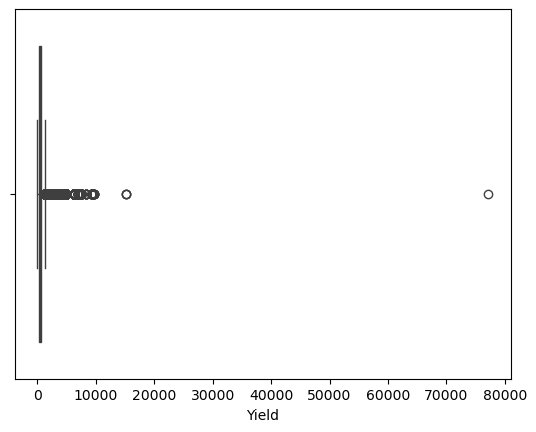

In [13]:
# Checking for outliers

outliers = ['Recency','Frequency','Yield']
for i in outliers:
    print(str(i)+': ')
    ax = sns.boxplot(x = k3[str(i)])
    plt.show()

In [14]:
# Removing outliers

# Create a new dataframe without CustomerID column

k3 = k3[['Recency','Frequency','Yield']]

from scipy import stats

z = stats.zscore(k3)
z_final = np.abs(z)
upda = (z_final < 3).all(axis=1)
k3 = k3[upda]

k3.head(100)

,Recency,Frequency,Yield
1,6,31,711.79
2,6,31,711.79
3,6,31,711.79
4,6,31,711.79
5,6,31,711.79
...,...,...,...
96,355,73,1757.55
97,355,73,1757.55
98,355,73,1757.55
99,355,73,1757.55


In [15]:
# Scale data for our model

from sklearn.preprocessing import StandardScaler


k3 = k3.drop_duplicates()
names = ['Recency', 'Frequency', 'Yield']
att = k3[names]
scaler = StandardScaler().fit(att.values)
att = scaler.transform(att.values)
fa = pd.DataFrame(att, columns = names)

fa.head()


,Recency,Frequency,Yield
0,-1.22,0.34,0.99
1,-1.15,-0.30,1.52
2,1.74,2.27,4.06
3,-0.74,-0.30,-0.12
4,-0.62,-0.39,-0.24


C:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is kn

Text(0, 0.5, 'Inertia')

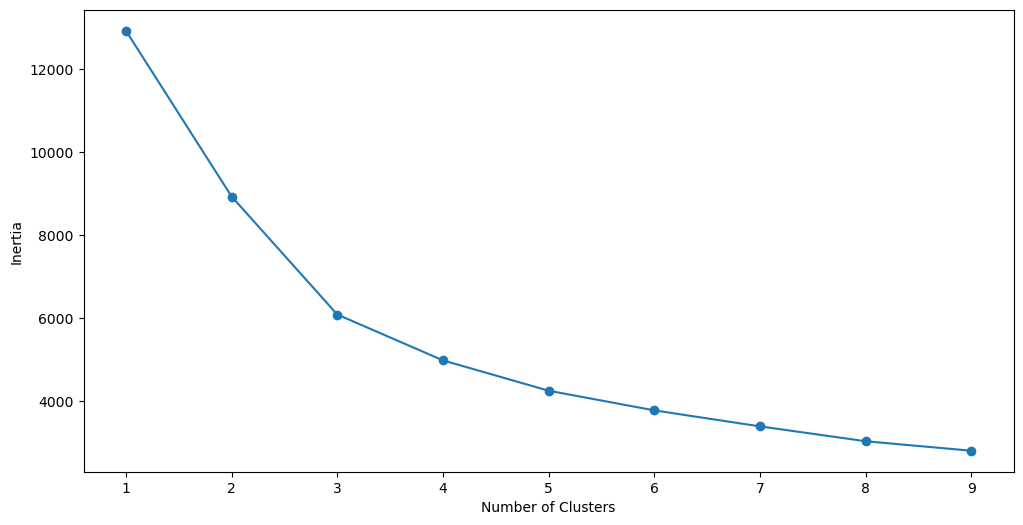

In [16]:
# Implement K-means clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

GE = []
for cluster in range(1,10):
    KM = KMeans(n_clusters = cluster, init='k-means++')
    KM.fit(fa)
    GE.append(KM.inertia_)
    
# Plot the results

k4 = pd.DataFrame({'Cluster':range(1,10), 'GE':GE})
plt.figure(figsize=(12,6))
plt.plot(k4['Cluster'], k4['GE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


In [18]:
# From above, we see  4 clusters are optimal, so we redo the model with 4 clusters and evaluate its performance

KM2 = KMeans( n_clusters = 4, init='k-means++')
KM2.fit(fa)

print(silhouette_score(fa, KM2.labels_, metric='euclidean'))


C:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(


0.4042965994648848


In [19]:
# Predict with the model

fc = KM.predict(fa)
k5 = pd.DataFrame(k3)
k5['Cluster'] = fc
k5.head()


,Recency,Frequency,Yield,Cluster
1,6,31,711.79,4
32,15,17,892.80,4
49,355,73,1757.55,8
122,63,17,334.40,6
139,77,15,296.50,6


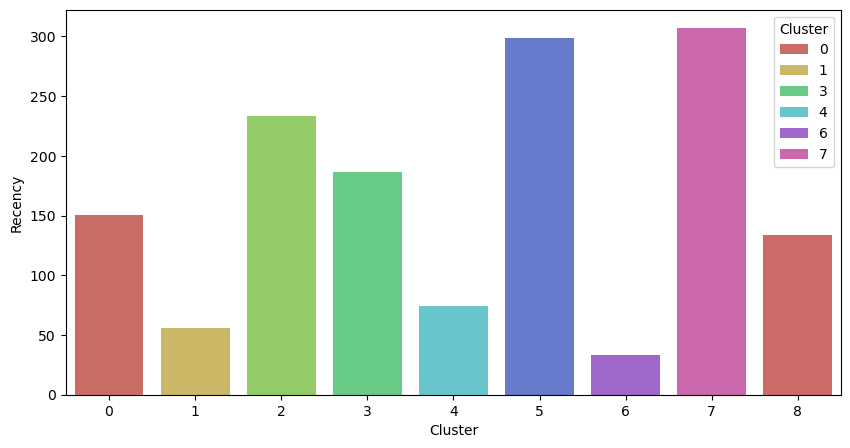

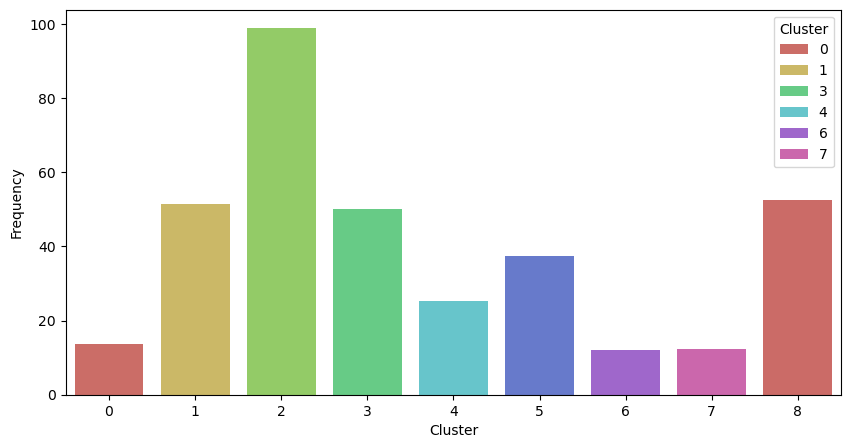

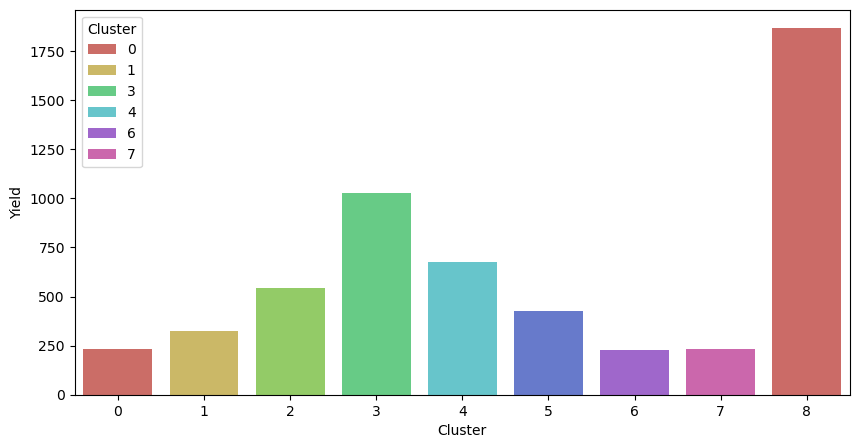

In [53]:
# Plot the prediction model and clusters forecasted

k6 = k5.groupby(['Cluster'], as_index = False).mean()

#fig, axs = plt.subplots(figsize=(10, 5))

for i in outliers :
   fig, axs = plt.subplots(figsize=(10, 5))
   sns.barplot(x='Cluster', y=str(i), data = k6, hue = 'Cluster', palette = 'hls' )
   plt.show()    

